In [81]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from scipy.special import expit
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [108]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [109]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1986,16,0.600,0.296,0,-17.957,1,0.0356,0.7730,0.000889,0.4550,0.434,116.288,4
1,2016,46,0.598,0.983,4,-3.676,0,0.0969,0.0234,0.000000,0.1540,0.338,107.976,4
2,1981,38,0.403,0.286,7,-16.624,1,0.0450,0.9850,0.763000,0.1380,0.876,138.847,4
3,2005,38,0.637,0.369,2,-10.331,1,0.0296,0.3650,0.001170,0.1360,0.533,111.069,4
4,1970,48,0.543,0.115,0,-16.068,1,0.0877,0.7910,0.000000,0.0679,0.529,110.291,4


In [110]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.7*len(data)), int(.85*len(data))])

In [111]:
# Split output and convert to array
train_output = train_data.Popularity
train_output = np.asarray(train_output,dtype=np.float64)
train_output_norm = train_data.Popularity
train_output_norm = np.asarray(train_output_norm,dtype=np.float64)
train_data = train_data.drop(['Popularity'], axis=1)
train_data_norm = train_data
train_data = np.asarray(train_data,dtype=np.float64)
train_data_norm = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])
training_count_norm = len(train_data[:,0])

validate_output = validate_data.Popularity
validate_output = np.asarray(validate_output,dtype=np.float64)
validate_output_norm = validate_data.Popularity
validate_output_norm = np.asarray(validate_output_norm,dtype=np.float64)
validate_data = validate_data.drop(['Popularity'], axis=1)
validate_data_norm = validate_data
validate_data = np.asarray(validate_data,dtype=np.float64)
validate_data_norm = np.asarray(validate_data,dtype=np.float64)
validate_count = len(validate_data[:,0])
validate_count_norm = len(validate_data[:,0])

test_output = test_data.Popularity
test_output = np.asarray(test_output,dtype=np.float64)
test_output_norm = test_data.Popularity
test_output_norm = np.asarray(test_output_norm,dtype=np.float64)
test_data = test_data.drop(['Popularity'], axis=1)
test_data_norm = test_data
test_data = np.asarray(test_data,dtype=np.float64)
test_data_norm = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])
test_count_norm = len(test_data[:,0])

In [112]:
print(training_count)
print(validate_count)
print(test_count)

42730
9157
9157


In [113]:
# normalized the dataset
train_data_norm = min_max_scaler.fit_transform(train_data_norm)

validate_data_norm = min_max_scaler.fit_transform(validate_data_norm)

test_data_norm = min_max_scaler.fit_transform(test_data_norm)

In [114]:
reg = LinearRegression().fit(train_data,train_output)
reg_norm = LinearRegression().fit(train_data_norm,train_output)

In [115]:
print(reg.score(test_data,test_output))
print(reg_norm.score(test_data_norm,test_output))

0.11693724860849275
0.10539898308448827


In [116]:
# Make predictions using the testing set
test_data_pred = reg.predict(test_data)

In [117]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_output, test_data_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_output, test_data_pred))

Coefficients: 
 [ -0.01402117  13.2249497   -3.90078154   0.04618002   0.75473085
  -0.51999545   3.15187883  -9.1249136   -4.8778799   -7.7832228
 -10.36912182   0.01696667   0.61853585]
Mean squared error: 298.59
Coefficient of determination: 0.12


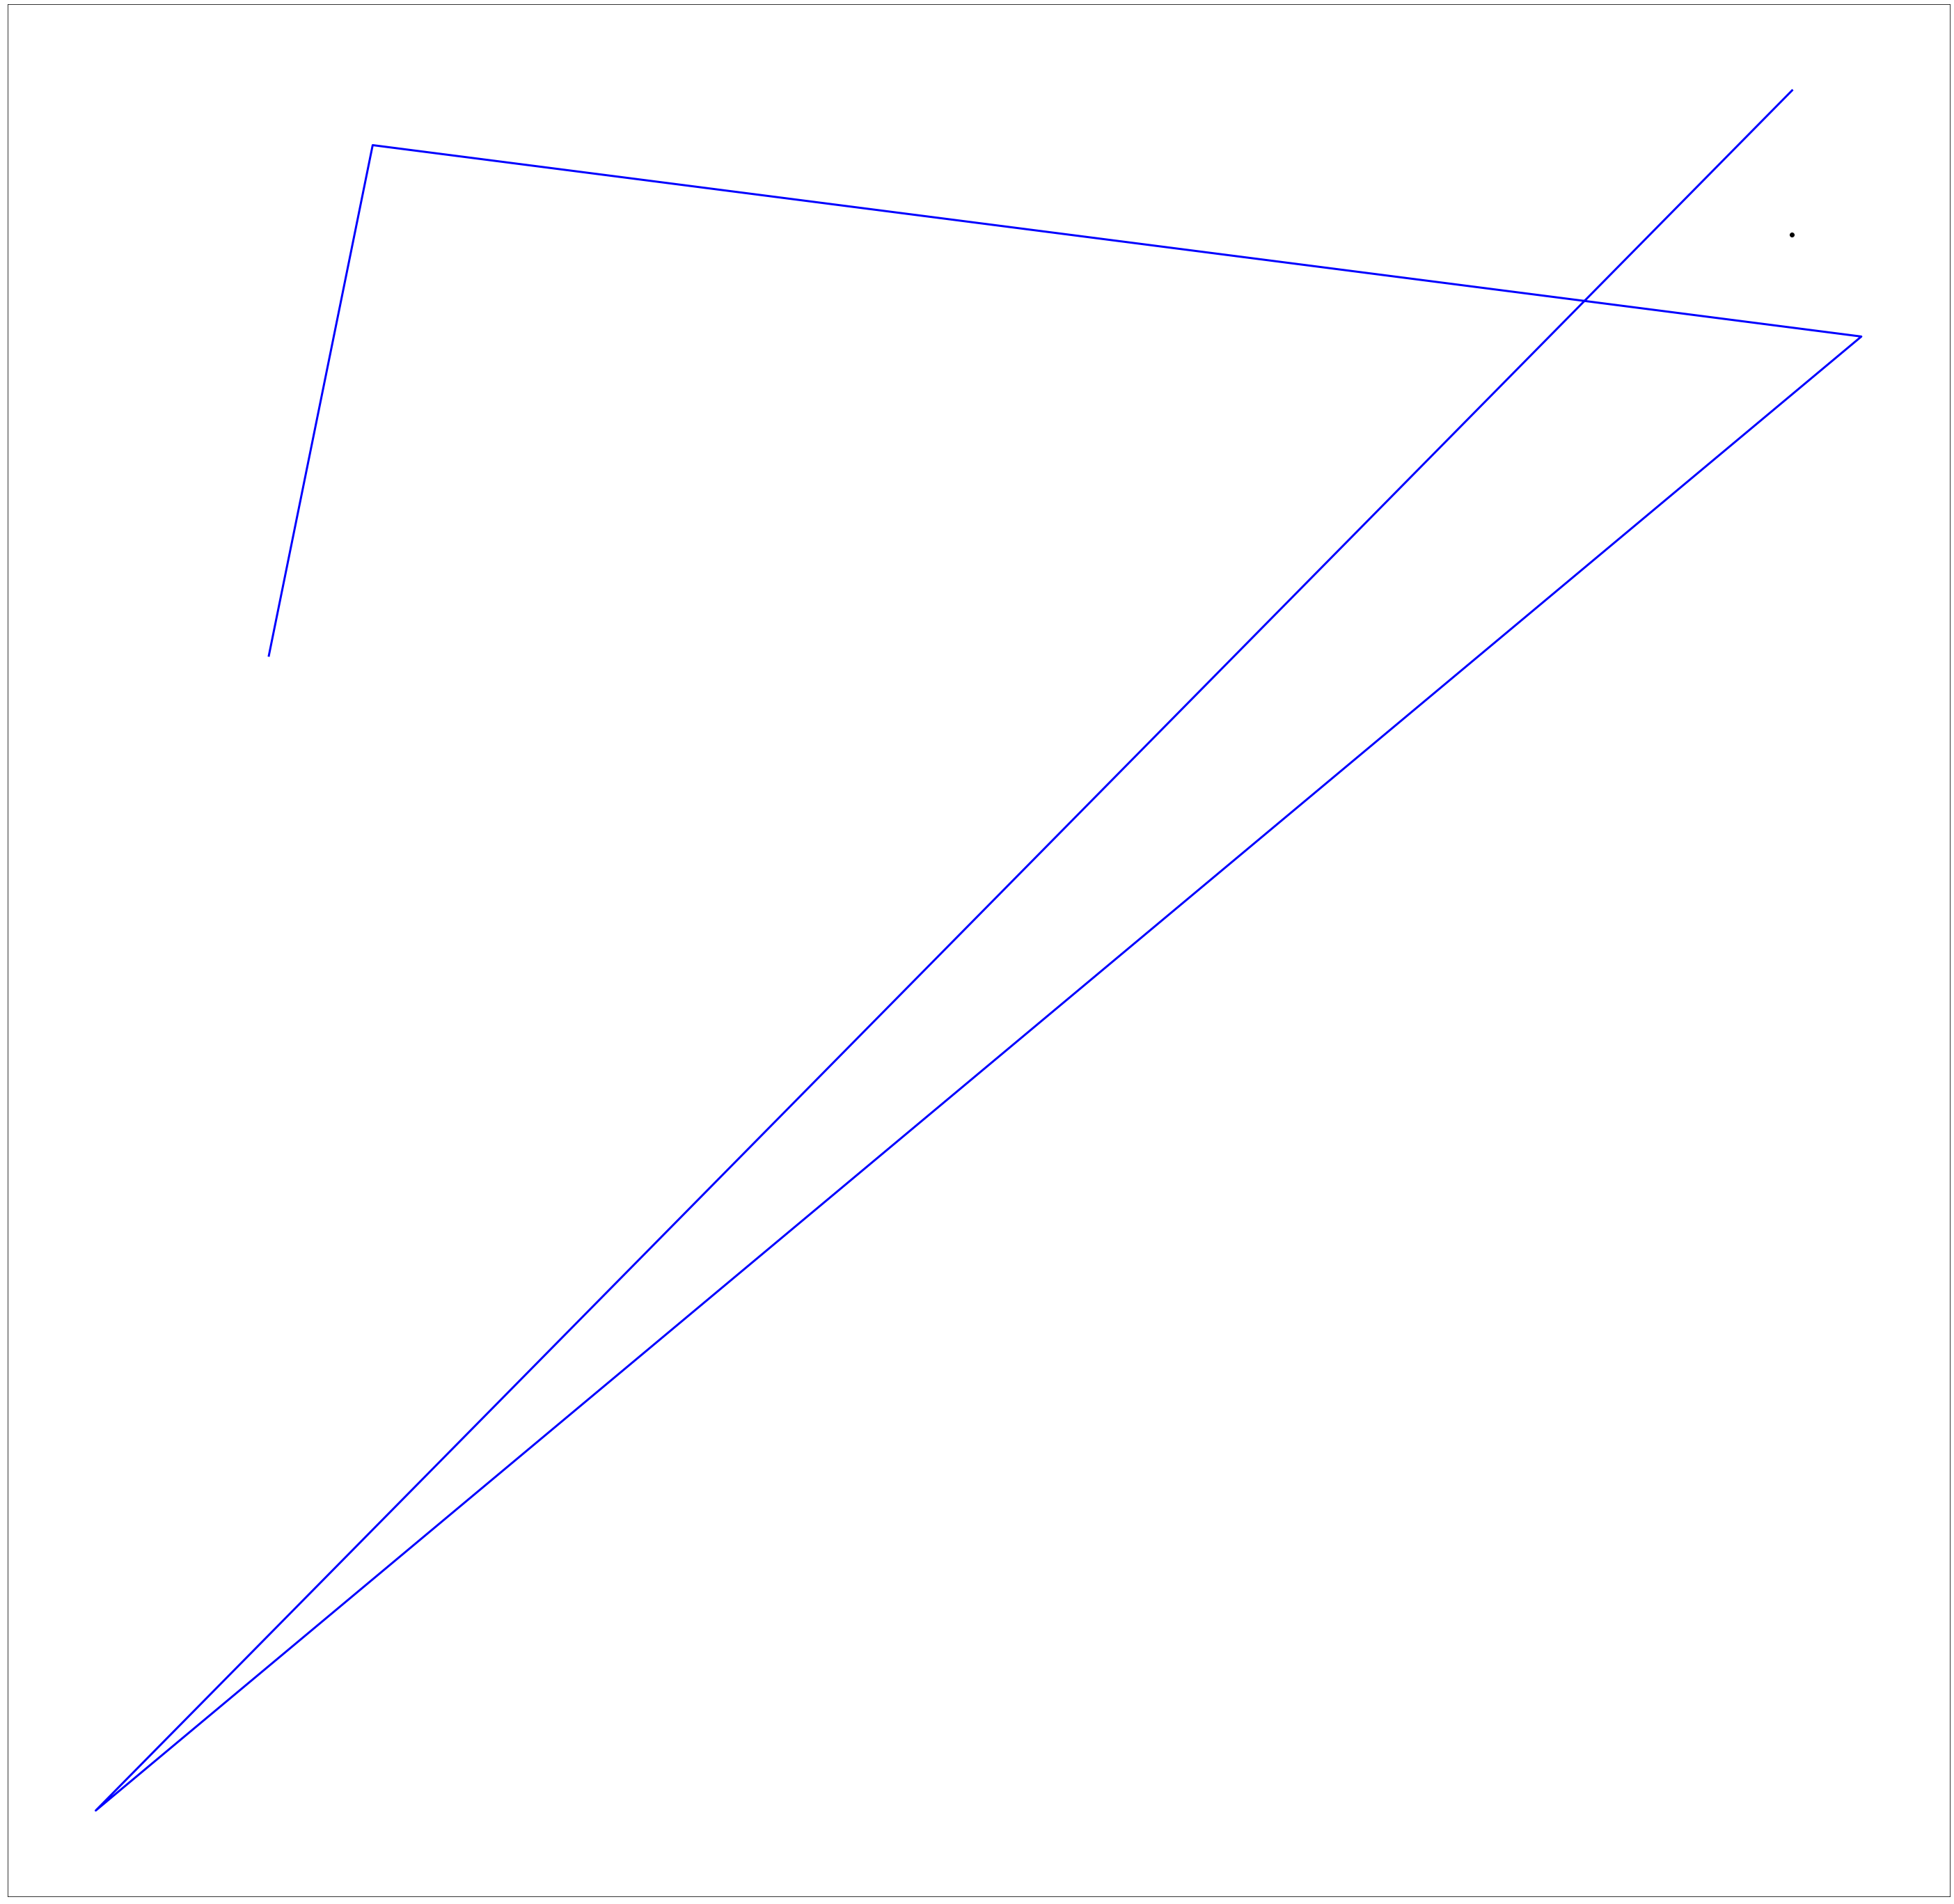

In [132]:
# Plot outputs
plt.figure(figsize=(50,50))
plt.scatter(test_output[0], validate_output[0],  color='black')
plt.plot(test_output[:5], test_data_pred[:5], color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()